<a href="https://colab.research.google.com/github/harshsojitra007/CE132_ML_Labs/blob/main/ML_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[array([118.5]), array([118.26403295]), array([118.83488146]), array([118.34944713]), array([119.70907409]), array([118.8378273]), array([118.62529198]), array([118.32603521]), array([118.8962955]), array([119.23701452]), array([119.06304994]), array([118.60447457]), array([118.92917683]), array([118.79629909]), array([118.68366032]), array([118.44233551]), array([119.60795961]), array([119.02829252]), array([118.48524592]), array([119.41699186]), array([118.75355975]), array([119.47810612]), array([118.47116082]), array([118.58876735]), array([119.01377509])]
Accuracy 0.6125
Precision 0.0
Recall 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


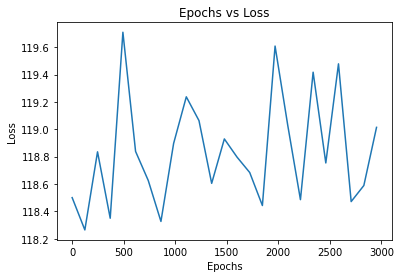

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

sc = StandardScaler()

def Sign(num):
  if num >= 0.5:
    return 1
  else:
    return 0

def Predict(num, theta0, theta1, sign=False):
  denominator = (1 + (math.e ** (-(theta0 + (theta1 * num)))))
  if sign == True:
    return Sign(1 / denominator)
  else:
    return (1 / denominator)

def findProbability(samples):
  zeros = 0
  count = 0
  for x in samples:
    if x[0] == 0:
      zeros += 1
    count += 1
  return zeros / count

def CalculateLoss(predicted, actual):
  pZero = findProbability(actual)
  pOnes = 1 - pZero
  ans = 0
  for i in range(len(predicted)):
    left = right = 0
    if predicted[i] != 0:
      left = (pZero * math.log(predicted[i], 2))
    if predicted[i] != 1:
      right = (pOnes * (1.0 - predicted[i]))
    ans += (-1 * (right + left))
  return ans

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BuyComputer.csv")
data.drop(columns=["User ID",], axis=1, inplace=True)

labels = data.iloc[:,-1]
features = data.iloc[:,:-1]

age = data["Age"]
EstimatedSalary = data["EstimatedSalary"]

labels = list(zip(labels))
features = list(zip(age, EstimatedSalary))

trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(features, labels, test_size=0.4)
trainFeatures = sc.fit_transform(trainFeatures)
testFeatures = sc.fit_transform(testFeatures)

weight = [[2] for _ in range(2)]
bias = [[0.2] for _ in range(len(trainFeatures))]

op = trainFeatures.dot(weight)
hypothesis = op + bias

predictedOutput = []

# learning rate
alpha = 0.0001
rows, cols = trainFeatures.shape
theta0 = theta1 = 0

losses = []
epochs = []

for _ in range(3000):
  sigma0 = sigma1 = 0
  predictedOutput = []
  for i in range(len(hypothesis)):
    prediction = Predict(hypothesis[i], theta0, theta1, sign=False)
    predictedOutput.append(prediction)
    label = list(trainLabels[i])
    sigma0 += (Sign(prediction) - int(label[0]))
    sigma1 += ((Sign(prediction) - int(label[0])) * hypothesis[i])
  theta0 -= (alpha * sigma0)
  theta1 -= (alpha * sigma1)
  if _ % 123 == 0:
    losses.append(CalculateLoss(predictedOutput, trainLabels))
    epochs.append((_ + 1))

print(losses)

row, col = testFeatures.shape
bias = [[0.2] for _ in range(len(testFeatures))]

op = testFeatures.dot(weight)
hypothesis = op + bias

predictedOutput = []

for i in range(len(hypothesis)):
  prediction = Predict(hypothesis[i], theta0, theta1, sign=True)
  predictedOutput.append(prediction)

print('Accuracy {}'.format(accuracy_score(testLabels, predictedOutput)))
print('Precision {}'.format(precision_score(testLabels, predictedOutput)))
print('Recall {}'.format(recall_score(testLabels, predictedOutput)))

plt.plot(epochs, losses)
  
# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Loss')
  
# giving a title to my graph
plt.title('Epochs vs Loss')
  
# function to show the plot
plt.show()

In [67]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BuyComputer.csv")

labels = data['Purchased']
features = data.drop(columns=['Purchased', 'User ID'], axis=1)

trainF, testF, trainL, testL = train_test_split(features, labels, random_state=7, test_size=0.3)

model = LogisticRegression(random_state=132, max_iter=1000)
model.fit(trainF, trainL)

print(model.predict([(28, 76000)]))

predicted = model.predict(testF)

print('Accuracy {}'.format(accuracy_score(testL, predicted)))
print('Precision {}'.format(precision_score(testL, predicted)))
print('Recall {}'.format(recall_score(testL, predicted)))

[0]
Accuracy 0.875
Precision 0.75
Recall 0.8918918918918919


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
